# Unbalanced Matching Markets

## Section 1: Introduction

Two-sided markets are described by two disjoint sets of men and women.
The core of a two-sided market is the set of stable matchings, where a matching is stable if there is no man and woman who both prefer each other over their assigned partners.

男女間のマッチングのコアとは, stable matchings$)(#()'$の集合.

### この論文の内容

男女間のマッチングについて

1, 男女間の人数の小さな差でもマッチングに$?"-----
1, any matching market is likely to have a small core, the competition resulting from even the slightest imbalance yields an essentially unique stable matching.

2, the essentially unique stable outcome can be almost fully characterized using only the distribution of preferences and the number of agents on each side.
(each agent on the short side of the market is matched with one of his top choices. Each agent on the long side is either unmatched or does almost no better than being matched with a random partner.)
人数の小さいサイドがより望みの相手とマッチでき, そのアドバンテージはモデルの小さな変化でも変わらない.
(simulation results showing that the short side’s advantage is robust to small changes in the model.)

## Section 2: Model and Results

以下便宜上男性が女性にproposeするとする.

男性の集合$\mathcal{M} = \{1,\ldots,n\}$

女性の集合$\mathcal{W} = \{1, \ldots  , n + k\}$

どの男性$m$も"complete strict preference list" を女性の集合に対して持つと仮定する. 女性も同様. 
ただし, complete strict preference listは 皆がunmatchedよりもmatchedの状態を必ず好むということ.
つまり, 選好表の最後の行のみに0が来る.

マッチングとは定義域が$\mathcal{M}\cup \mathcal{W}$である自分自身への写像$\mu$で, 

1. for every $m \in \mathcal{M}, \mu(m) \in \mathcal{W} \cup \{m\}$, and for every $w \in \mathcal{W}, \mu(w) \in \mathcal{M}\{w\}$

1. for every $m, w \in \mathcal{M}\cup\mathcal{W}, \mu(m) = w \ \ \ \mathrm{implies} \ \ \ \mu(w) = m$

$\mu$がunstableとはある男性$m$ と女性 $w$が存在し, $w\succ_m\mu(m)$ and $m \succ_w \mu(w)$.
$m$が$w$のstable partner (逆も) とは, あるstable matchingが存在し, そこで$m$が$w$とマッチしていること.

ランダムマッチングマーケットとは"complete preference list"をそれぞれの男女に独立にランダムに選ぶことで作られる. 

### 定義

MOSM(the men-optimal stable matching): 男性がプロポーズするDAアルゴリズムによって作られ, どの男性も最も好みのstable womanとマッチする. 

WOSM(the women-optimal stable matching): MOSMとは逆, 女性がプロポーズするDAアルゴリズムや, この論文のアルゴリズム2によって作られる.

男性mの選好表の女性$w$のランクを$\mathrm{Rank}_m(w) =  |\{w' : w' \succeq_m w\}|$と表す.

女性も同様に$\mathrm{Rank}_w(m)$と表す.

$$
\mathrm{R}_{\mathrm{MEN}}(\mu) = \frac{1}{|\mathcal{M} \setminus \mathcal{\bar M}|} \sum_{m\in \mathcal{M}\setminus \mathcal{\bar M} } \mathrm{Rank}_m(\mu(m)) 
$$

$\mathcal{\bar M}$ is the set of men who are unmatched under $\mu$.

$$
\mathrm{R}_{\mathrm{WOMEN}}(\mu) = \frac{1}{|\mathcal{W} \setminus \mathcal{\bar W}|} \sum_{w\in \mathcal{W}\setminus \mathcal{\bar W} } \mathrm{Rank}_w(\mu(w)) 
$$


$\mathcal{\bar W}$ is the set of women who are unmatched under $μ$.

We use two metrics for the size of the core. 

a) we consider the fraction of agents who have multiple stable partners.

b) we consider the difference between the men’s average rank of wives under the MOSM and under the WOSM.

### Previous Results

Theorem [Pittel (1989b)].

In a random matching market with n men and n women, the fraction of agents who have multiple stable partners converges to $1$ as $n \rightarrow 1$.

Furthermore,
$$
\frac{R_{MEN} (\mathrm{MOSM})}{\log n} \rightarrow_p 1
$$
$$
\frac{R_{WOMEN} (\mathrm{WOSM})}{n / \log n} \rightarrow_p 1
$$

In [1]:
using PyPlot
include("da2.jl")

call_simple_match (generic function with 2 methods)

In [2]:
n_range = 1:1000:10000

ind1 = []
for k in n_range
    m, n = k, k
    m_prefs, f_prefs = generate_random_preference_data(m, n)
    m_matched, f_matched = call_match(m_prefs, f_prefs)
    push!(ind1, r_men(m_matched, m_prefs)/log(k))
end

In [3]:
ind2 = []
for k in n_range
    m, n = k, k
    m_prefs, f_prefs = generate_random_preference_data(m, n)
    m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
    push!(ind2, r_men(m_matched, m_prefs)/k*log(k))
end

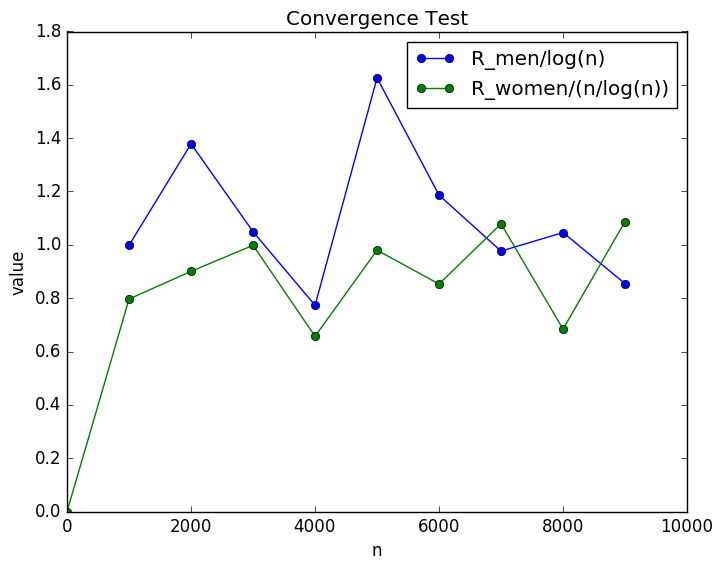

PyObject <matplotlib.legend.Legend object at 0x31f620470>

In [21]:
fig, ax = subplots()
ax[:plot](n_range, ind1, label="R_men/log(n)", "-o")
ax[:plot](n_range, ind2, label="R_women/(n/log(n))", "-o")
ax[:set_xlabel]("n")
ax[:set_ylabel]("value")
title("Convergence Test")
ax[:legend]()

Theorem 1.

Consider a sequence of random matching markets, indexed by $n$, with $n$ men and $n + k$ women, for arbitrary $k = k(n) \geq 1$. Fix any $\epsilon > 0$. With high probability, we have that

(i) the fraction of men and the fraction of women who have multiple stable partners are each no more than $\epsilon$, and

(ii) the men’s average rank of wives is almost the same under all stable matchings, as is the women’s average rank of husbands:
$$
R_{MEN} (\mathrm{WOSM})  \leq (1 + \epsilon)R_{MEN} (\mathrm{MOSM})
$$
$$
R_{WOMEN} (\mathrm{WOSM})  \geq (1 - \epsilon)R_{WOMEN} (\mathrm{MOSM})
$$


In [14]:
n = 40
r_mens = []
m_range = 20:60
for m in m_range
    m_prefs, f_prefs = generate_random_preference_data(m, n, complete=true)
    m_matched, f_matched = call_match(m_prefs, f_prefs)
    push!(r_mens, r_men(m_matched, m_prefs))
end

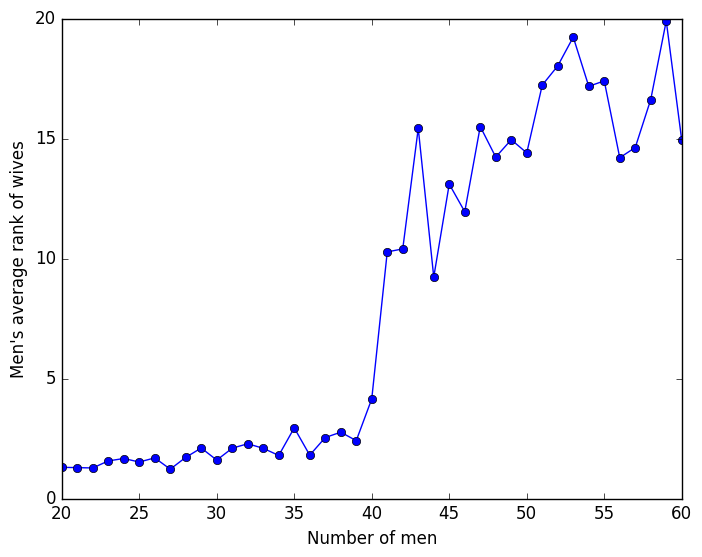

In [20]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend]()

In [34]:
n = 40
r_mens = []
r_womens = []
m_range = 20:60
num_loops = 1000
for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=true)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
        push!(rws, r_women(f_matched, f_prefs))
    end
    push!(r_mens, mean(rs))
    push!(r_womens, mean(rws))
end

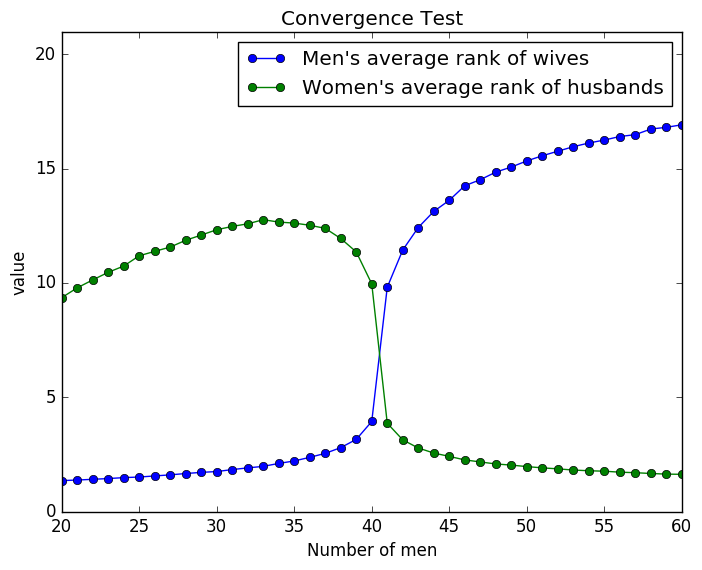

PyObject <matplotlib.legend.Legend object at 0x324796ba8>

In [35]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o", label="Men's average rank of wives")
ax[:plot](m_range, r_womens, "-o", label="Women's average rank of husbands")
ax[:set_ylim](0, 21)
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("value")
ax[:legend]()

In [26]:
n = 40
r_mens = []
r_mens_wosm = []
m_range = 20:60
num_loops = 1000
for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
    end
    push!(r_mens, mean(rs))
end

for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
        #push!(rws, r_women(f_matched, f_prefs))
    end
    push!(r_mens_wosm, mean(rs))
    #push!(r_womens, mean(rws))
end

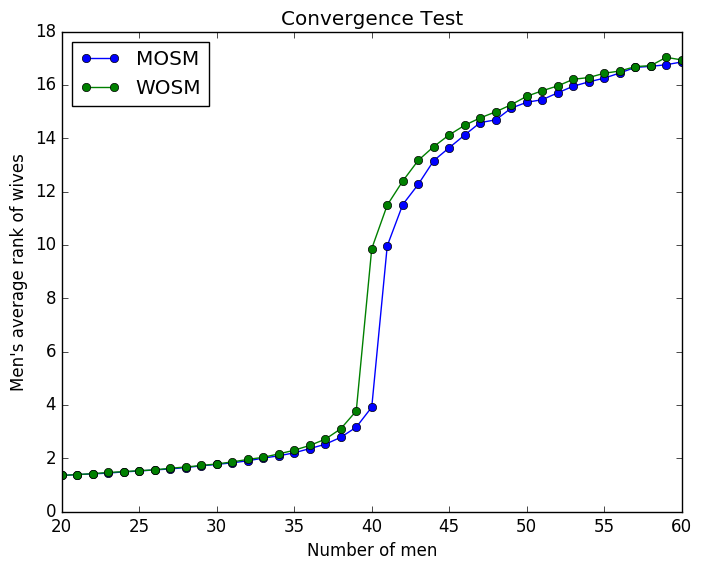

PyObject <matplotlib.legend.Legend object at 0x3201be3c8>

In [33]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o", label="MOSM")
ax[:plot](m_range, r_mens_wosm, "-o", label="WOSM")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=2)

In [36]:
##############complete=false notoki ha?

n = 40
r_mens = []
r_mens_wosm = []
m_range = 20:60
num_loops = 1000
for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
    end
    push!(r_mens, mean(rs))
end

for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false)
        m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
        #push!(rws, r_women(f_matched, f_prefs))
    end
    push!(r_mens_wosm, mean(rs))
    #push!(r_womens, mean(rws))
end

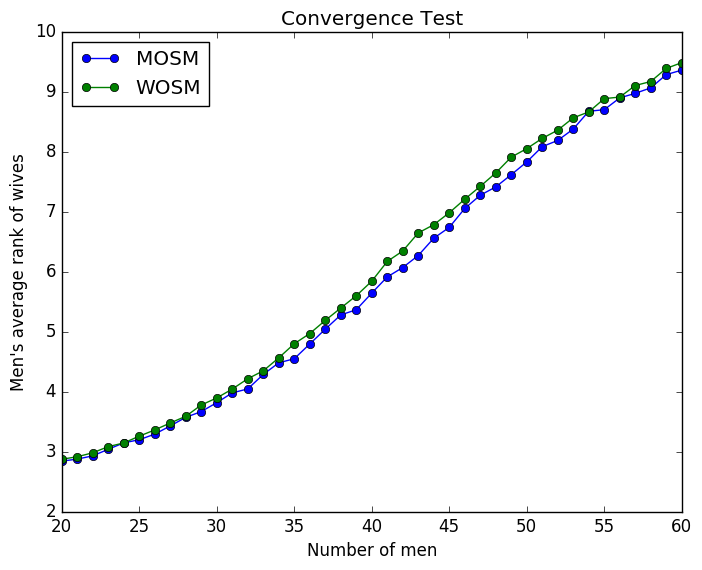

PyObject <matplotlib.legend.Legend object at 0x31f681ef0>

In [37]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o", label="MOSM")
ax[:plot](m_range, r_mens_wosm, "-o", label="WOSM")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=2)

In [91]:
n = 40
m_range = 20:60
num_loops = 100
stage_range = 1:5:30
r_mens = Array(Float64, num_loops, length(m_range), length(stage_range))
for (j, m) in enumerate(m_range)
    rs = []
    for (k, stage) in enumerate(stage_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false, stage=1)#->complete
            m_matched, f_matched = call_match(m_prefs, f_prefs)
            r_mens[l, j, k] = r_men(m_matched, m_prefs)
        end
    end
end

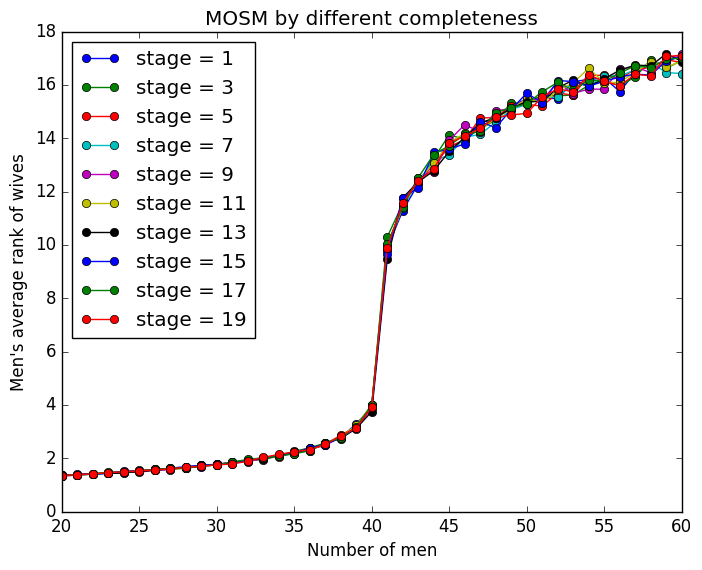

PyObject <matplotlib.legend.Legend object at 0x32aa60588>

In [92]:
fig, ax = subplots()
for (k, stage) in enumerate(stage_range)
    ax[:plot](m_range, [mean(r_mens[:, j, k]) for j in 1:length(m_range)], "-o", label="stage = $stage")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
#ax[:set_ylim]()
title("MOSM by different completeness")
ax[:legend](loc=2)

The first computational experiment illustrates the sharp effect of imbalance in a small market. We consider markets with 40 women and a varying number of men, from 20 to 60 men. For each market size we simulate 10,000 realizations by drawing uniformly random complete preferences independently for each agent.

Observe that, even in such small markets, the large core of the balanced market (40 men and 40 women) is a knife-edge case.

When there are more women than men the men’s average rank of wives is small: Most men are matched with one of their top choices. On the other hand, the women’s average rank of husbands is not much better than that resulting from random assignment.

Theorem 2. 

Consider a sequence of random matching markets, indexed by $n$, with $n$ men and $n + k$ women, for arbitrary $k = k(n)\geq   1$. With high probability, the following hold for every stable matching $\mu$:
$$
R_{MEN} (\mu)  \leq (1 + \epsilon)\biggl(\frac{n+k}{n}\biggr)\log \biggl(\frac{n+k}{n}\biggr)
$$
$$
R_{WOMEN} (\mu)  \geq n / \biggl[(1 + \epsilon)\biggl(\frac{n+k}{n}\biggr)\log \biggl(\frac{n+k}{n}\biggr)\biggr]
$$

For comparison, consider the assignments generated by the men’s random serial dictatorship (RSD) mechanism. In RSD, men are ordered at random, and each man chooses his favorite woman who has yet to be chosen (ignoring women’s preferences). The men’s average rank of wives under RSD is approximately 
$$
\biggl(\frac{n+k}{n}\biggr)\log\biggl(\frac{n+k}{n}\biggr)
$$
Thus, under any stable matching, the men’s average rank of wives would be almost the same as under RSD. The women’s average rank of husbands under any stable matching is better than getting a random husband by only a small factor of at most log n. Thus, roughly speaking, in any stable matching, the short side “chooses” while the long side is “chosen.”

In [38]:
n = 40

m_range = 20:60
num_loops = 1000

r_mens = Array(Float64, num_loops, length(m_range))
r_mens_wosm = Array(Float64, num_loops, length(m_range))
r_mens_rsd = Array(Float64, num_loops, length(m_range))

for (j, m) in enumerate(m_range)
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        r_mens[l, j] = r_men(m_matched, m_prefs)
    end
end

for (j, m) in enumerate(m_range)
    rs = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
        r_mens_wosm[l, j] = r_men(m_matched, m_prefs)
    end
end

for (j, m) in enumerate(m_range)
    rs = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = rsd(m, n, m_prefs)
        r_mens_rsd[l, j] = r_men(m_matched, m_prefs)
    end
end

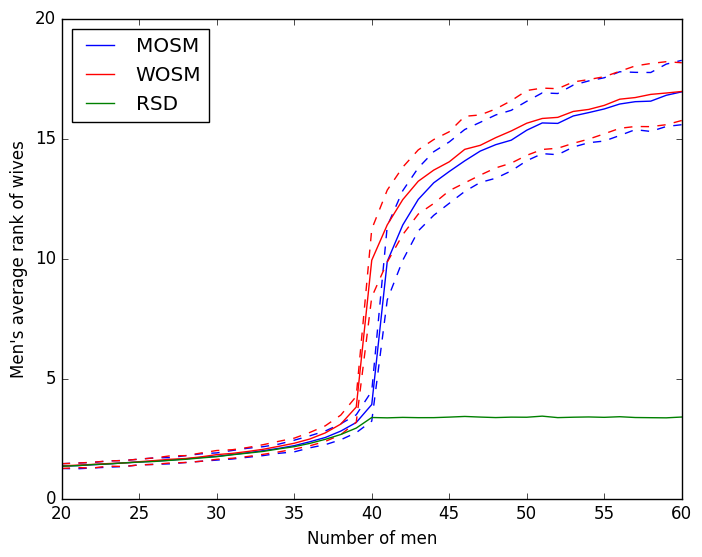

PyObject <matplotlib.legend.Legend object at 0x3201b84e0>

In [39]:
fig, ax = subplots()
ax[:plot](m_range, [mean(r_mens[:, j]) for j in 1:size(r_mens, 2)], color="b", label="MOSM")
ax[:plot](m_range, [quantile(r_mens[:, j], 1/4) for j in 1:size(r_mens, 2)], "--", color="b")
ax[:plot](m_range, [quantile(r_mens[:, j], 3/4) for j in 1:size(r_mens, 2)], "--", color="b")
ax[:plot](m_range, [mean(r_mens_wosm[:, j]) for j in 1:size(r_mens_wosm, 2)], color="r", label="WOSM")
ax[:plot](m_range, [quantile(r_mens_wosm[:, j], 1/4) for j in 1:size(r_mens, 2)], "--", color="r")
ax[:plot](m_range, [quantile(r_mens_wosm[:, j], 3/4) for j in 1:size(r_mens, 2)], "--", color="r")
ax[:plot](m_range, [mean(r_mens_rsd[:, j]) for j in 1:size(r_mens_rsd, 2)], color="g", label="RSD")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=2)

When men are on the short side (there are fewer than 40 men), they are matched, on average, with one of their top choices. When men are on the long side, they are either unmatched or rank their partner only slightly better than a random match. See Figure 3 for a comparison with the men’s average rank of wives under RSD. Section 4 provides simulation results indicating that Theorem 2 gives a good approximation for small markets, and that the advantage of the short side persists under correlated preferences.

Corollary 2.2. Consider a sequence of random matching markets with $n$ men and $n + 1$ women. Fix any $\epsilon > 0$. With high probability, in every stable matching, the men’s average rank of wives is no more than $(1 + \epsilon) \log n$, the women’s average rank of husbands is at least $\frac{n}{(1 + \epsilon) \log n}$, and the fractions of men and women who have multiple stable partners are each no more than $\epsilon$.

Corollary 2.3. For $\lambda > 0$, consider a sequence of random matching markets with $|\mathcal{M}| = n,|\mathcal{W}|=(1+\lambda)n$.
Fixany $\epsilon>0$. Define the constant $\kappa = (1+\epsilon)(1+ \lambda)\log(1+1/\lambda)$. 
We have that with high probability, in every stable matching, the men’s average rank of wives is at most $\kappa$, the women’s average rank of husbands is at least $n/(1 +\kappa)$, and the fractions of men and women who have multiple stable partners are each no more than $\epsilon$.

######## 2.6

## Section 3: Intuition for the results, new matching mechanism

the same woman $\bar w$ is unmatched in all stable matchings.(Roth, 1986)
Thus, every stable matching must also induce a stable matching for the balanced market that results from dropping $\bar w$.
A stable matching of the balanced market remains stable after we add $\bar w$ only if all men prefer their assigned match over $\bar w$. Intuitively, a matching is more likely to satisfy this constraint when the men are better off. Typically only a few stable matchings (that are all close to the MOSM of the balanced market) satisfy this constraint, and the core of the original market is small.

Algorithm 2 calculates the WOSM through the use of rejection chains.  The algorithm maintains a stable matching, initiated to be the MOSM, and in each phase attempts to move to a stable matching that is more preferred by women.

We name the phase according to how the chain ends: (a) an improvement phase ends with wˆ accepting a proposal from a man she prefers over m, and (b) a terminal phase ends with a proposal to an unmatched woman. 

a phase beginning with arbitrary $\bar w$ is very likely to be terminal:
the probability that a man in the chain will propose to an unmatched woman is roughly /(1+), while the probability that he will propose to wˆ is of order 1/n. Thus, improvement phases are rare, and most women will be matched with the same man under the MOSM and WOSM.

The analysis for markets of n men and n + 1 women is more involved and requires us to use links between different rejection chains.19 Denote by S the set of women for whom the algorithm has already found their most preferred stable husbands.

Algorithm 1. Men-proposing deferred acceptance (MPDA)
1. Every unmatched man proposes to his most preferred woman who has not already re- jected him. If no new proposal is made, output the current matching.
2. If a women has multiple proposals, she tentatively keeps her most preferred man and rejects the rest. Go to step 1.

Algorithm 2. MOSM to WOSM
• Input: A matching market with n men and n + k women.
• Initialization: Run the men-proposing deferred acceptance algorithm to get the men- optimal stable matching μ. Initialize S to be the set of women unmatched under μ. Select any wˆ 2 W\S.
• New phase:

1. Set μ ̃ μ. Set v1 wˆ and V (wˆ).
2. Divorce: Set m μ(wˆ) and have wˆ reject m.
3. Proposal: Man m proposes to his most preferred woman w who has not already rejected him.
4. w’s Decision:
(a) Ifw2/V andwprefersμ(w)overm,orifw2V andwprefersμ ̃(w)over
m, then w rejects m. Go to step 3.
(b) If w 2/ S [ V and w prefers m over μ(w), then w rejects her current partner.
Setm0 μ(w),μ(w) m. Append wtotheendofV. Setm m0 andgo to step 3.
(c) New stable matching: If w 2 V and w prefers m over μ ̃(w), then we have found a stable matching. If w = wˆ = v1, set μ(wˆ) m. Select wˆ 2 W\S and start a new phase from step 1.
If w = v_l for l > 1, record her current husband as m0 μ(w). Call the set of all proposals made after the proposal of m0 to w an internal improvement cycle (IIC). Set μ(w) m and update μ ̃ for the women in the loop by setting μ ̃(vj) μ(vj)for j= l,l+1,...,J. Remove v_l,..,vJ fromV,settheproposer m m0, and return to step 3, in which m (earlier m0) will again propose to w.
(d) End of terminal phase: If w 2 S and w prefers m over μ(w), then restore μ μ ̃andaddallthewomeninV toS. IfS=W,terminateandoutput μ ̃. Otherwise, select wˆ 2 W\S and begin a new phase from step 1.

## Section 4: Simulation Results

### Size of the core under correlated preferences


This section presents simulation results to examine the e↵ects of correlation in preferences on the size of the core. 

Oursimulationssuggestthat the core generally becomes smaller as preferences become more correlated, although there are examples of the opposite.

RandomUtilityModel

Each agent l has two characteristics, x^A_l and x^D_l . The utility of agent i for being matched with agent j is given by
$$
u_i(j) = \beta x^A_j - \gamma(x^D_i - x^D_j )^2 + \epsilon_{ij}
$$

$\epsilon_{ij}$ is an idiosyncratic term for the pair (i, j)  independently drawn from the standard logistic distribution. We use $x^A_i$ as a vertical quality that is desirable for all agents; with $x^A_i \sim U[0,1]$ drawn independently for each agent. We use $x^D_i$ as a location; with $x^D_i \sim U[0,1]$ drawn independently for each agent. The values of the coeffcient $\gamma$ determines agents’ preferences to be close to/far from their partner. The same values of the coeffcients $\beta, \gamma$ are used for both men and women.

When $\beta = \gamma = 0$ preferences are drawn independently and uniformly at random. As $\beta$ increases (keeping $\gamma$ fixed) preferences become more correlated, and if $\beta \rightarrow \infty$ all men will have the same preferences over women (and symmetrically).

########### simulation

Figure 4 shows the size of the core for different levels of imbalance and a range of coeffcient values. For each market we simulate 2,000 realizations and report the average percentage of men with multiple stable partners.28 We consider markets with 40 women and either 40, 41, 45, or 60 men, $\beta \in [0, 20]$ and $\gamma \in [20, 20]$. Observe that correlation tends to reduce the size of the core.

We interpret these results as complementary to our theoretical results, giving additional suggestive evidence that general preference distributions are likely to generate a small core.

In [65]:
n = 7
loops = 10000
m_range = 3:11
pmms = Array(Float64, loops, length(m_range))
for (j, m) in enumerate(m_range)
    for l in 1:loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        pmms[l, j] = pmm_fast(m_prefs, f_prefs)*100
    end
end

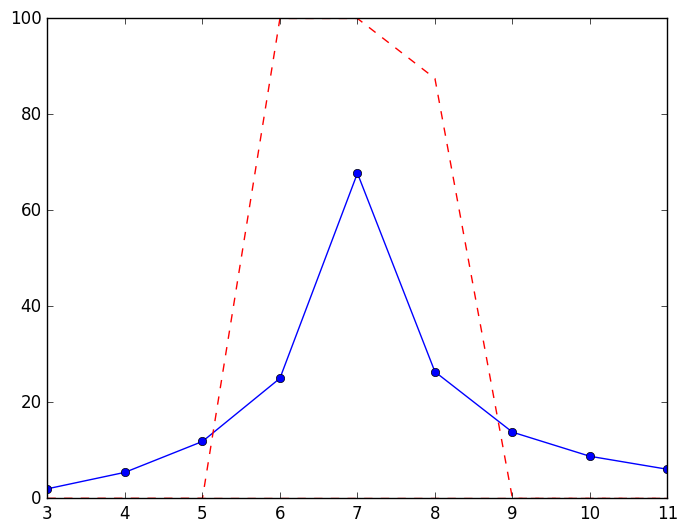

In [66]:
fig, ax = subplots()
ax[:plot](m_range, [mean(pmms[:, j]) for j in 1:length(m_range)], "-o")
ax[:plot](m_range, [quantile(pmms[:, j], 1/4) for j in 1:length(m_range)], "--", color="r")
ax[:plot](m_range, [quantile(pmms[:, j], 3/4) for j in 1:length(m_range)], "--", color="r")
ax[:legend]()

In [63]:
n = 40
loops = 100
m_range = 20:60
pmms = Array(Float64, loops, length(m_range))
for (j, m) in enumerate(m_range)
    for l in 1:loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        pmms[l, j] = pmm_fast(m_prefs, f_prefs)*100
    end
end

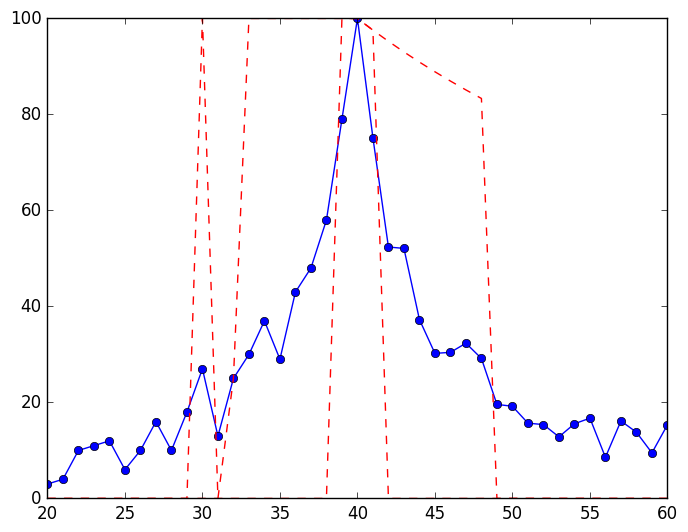

In [64]:
fig, ax = subplots()
ax[:plot](m_range, [mean(pmms[:, j]) for j in 1:length(m_range)], "-o")
ax[:plot](m_range, [quantile(pmms[:, j], 1/4) for j in 1:length(m_range)], "--", color="r")
ax[:plot](m_range, [quantile(pmms[:, j], 3/4) for j in 1:length(m_range)], "--", color="r")
ax[:legend]()

In [34]:
using RCall

In [44]:
R"get_ranks <- function(prefs, include_self = TRUE) {
   if (include_self == TRUE) {
       ranks <- array(rep(NA, (nrow(prefs)-1)*ncol(prefs)), dim = c((nrow(prefs)-1), ncol(prefs)))
    } else {
       ranks <- array(rep(NA, nrow(prefs)*ncol(prefs)), dim = c(nrow(prefs), ncol(prefs)))
    }
   for (j in 1:ncol(prefs)) {
       c = 1
       na = FALSE
       for (i in prefs[, j]) {
           if (i == 0) {
               na = TRUE
           }
           if (na == TRUE) {
               ranks[i, j] = NA
           } else {
               ranks[i, j] = c
           }

           c = c + 1
       }
   }
   return(ranks)
 }"
        print()

In [48]:
m, n = 10, 10
m_prefs, f_prefs = generate_random_preference_data(m, n)
matchings = list_all_matchings(m, n)
println(count_stable_matchings(matchings, m_prefs, f_prefs))
get_stable_matchings(matchings, m_prefs, f_prefs)

3


3-element Array{Any,1}:
 [2,7,8,3,1,10,5,9,4,6]
 [2,10,4,3,1,8,5,9,7,6]
 [2,10,8,3,1,4,5,9,7,6]

In [49]:
R"library(matchingMarkets)"

RCall.RObject{RCall.StrSxp}
[1] "matchingMarkets" "stats"           "graphics"        "grDevices"      
[5] "utils"           "datasets"        "methods"         "base"           


In [57]:
@time _, ms, _ = rcopy(R"hri(s.prefs = get_ranks($m_prefs), c.prefs = get_ranks($f_prefs))")

  0.023734 seconds (1.06 k allocations: 44.344 KB)


Dict{Symbol,Any} with 3 entries:
  symbol("s.prefs.smi") => 10x10 Array{Float64,2}:…
  :matchings            => 30×5 DataFrames.DataFrame…
  symbol("c.prefs.smi") => 10x10 Array{Float64,2}:…

In [73]:
ms[2][end, 1]

3

In [76]:
function count_stable_matchings_fast(m_prefs, f_prefs)
    _, ms, _ = rcopy(R"hri(s.prefs = get_ranks($m_prefs), c.prefs = get_ranks($f_prefs))")
    return ms[2][end, 1]
end

count_stable_matchings_fast (generic function with 1 method)

In [77]:
count_stable_matchings_fast(m_prefs, f_prefs)

3

In [78]:
m, n = 50, 50
m_prefs, f_prefs = generate_random_preference_data(m, n)
@time count_stable_matchings_fast(m_prefs, f_prefs)

  0.763006 seconds (58.90 k allocations: 1.766 MB)


46

In [126]:
include("da2.jl")

call_simple_match (generic function with 2 methods)

In [127]:
m, n = 5, 6
beta = 0.1
gamma = 0.3
get_mn_prefs_by_utility(m, n, beta, gamma)

(
7x5 Array{Int64,2}:
 3  6  1  4  6
 4  2  4  3  1
 2  5  5  1  5
 5  3  2  5  4
 6  1  3  6  2
 1  4  6  2  3
 0  0  0  0  0,

6x6 Array{Int64,2}:
 5  2  4  4  5  2
 3  5  1  5  2  5
 4  1  3  1  1  4
 2  3  2  3  3  1
 1  4  5  2  4  3
 0  0  0  0  0  0)

In [10]:
include("da2.jl")

call_simple_match (generic function with 2 methods)

In [8]:
m = 20
n = 20
gamma_range = -20:20
beta_range = 0:20
pmms3d = Array(Float64, length(gamma_range), length(beta_range))
for (i, gamma) in enumerate(gamma_range)
    for (j, beta) in enumerate(beta_range)
        m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma)
        pmms3d[i, j] = pmm_fast(m_prefs, f_prefs)
    end
end

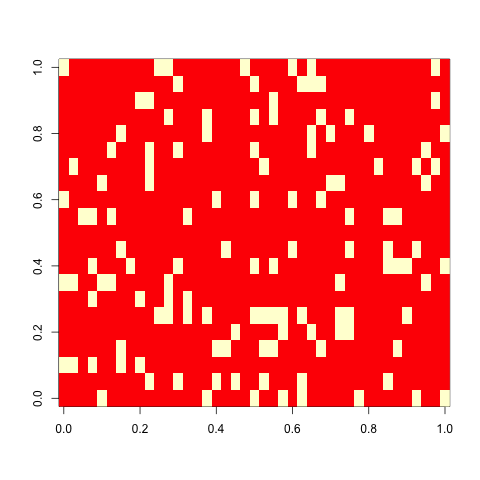

RCall.RObject{RCall.NilSxp}
NULL


In [9]:
R"image($pmms3d)"

In [1]:
include("da2.jl")

call_simple_match (generic function with 2 methods)

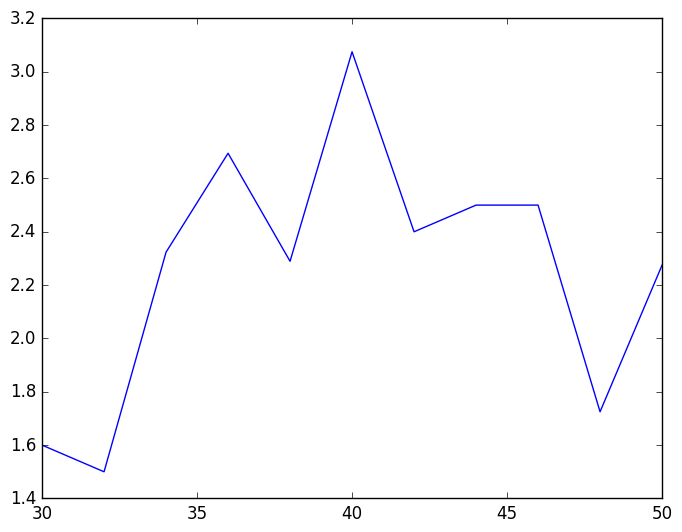

In [67]:
m_range = 30:2:50
n = 40
gamma = 0
beta_range = 0:0
loops = 20
r_mens = Array(Float64, loops, length(m_range), length(beta_range))
for (i, m) in enumerate(m_range)
    for (j, beta) in enumerate(beta_range)
        m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n), set_epsilons(m, n)
        for l in 1:loops
            m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons)
            m_matched, _ = call_match(m_prefs, f_prefs)
            r_mens[l, i, j] = r_men(m_matched, m_prefs)
        end
    end
end

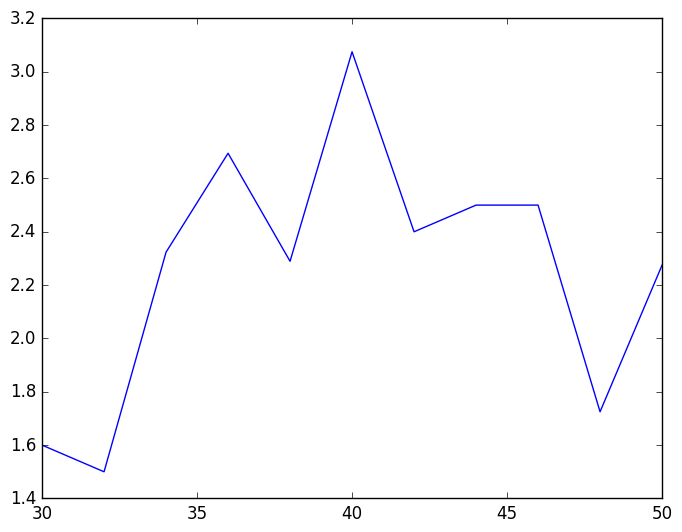

In [68]:
for j in 1:length(beta_range)
    plot(m_range, [mean(r_mens[:, i, j]) for i in 1:length(m_range)])
end

In [59]:
m_range = 30:2:50
n = 40
gamma = 0
beta_range = [0, 1, 2, 5, 10, 100]
r_mens = Array(Float64, length(m_range), length(beta_range))
for (i, m) in enumerate(m_range)
    m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n), set_epsilons(m, n)
    for (j, beta) in enumerate(beta_range)
        m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons)
        m_matched, _ = call_match(m_prefs, f_prefs)
        r_mens[i, j] = r_men(m_matched, m_prefs)
    end
end

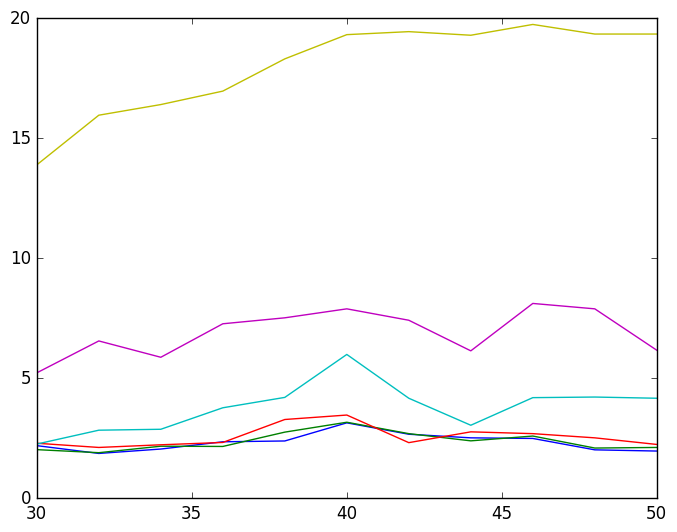

In [60]:
for j in 1:length(beta_range)
    plot(m_range, r_mens[:, j])
end

In [62]:
m_range = 30:2:50
n = 40
beta = 0
gamma_range = [0, 1, 2, 5, 10, 100, 1000]
r_mens = Array(Float64, length(m_range), length(gamma_range))
for (i, m) in enumerate(m_range)
    m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n), set_epsilons(m, n)
    for (j, gamma) in enumerate(gamma_range)
        m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons)
        m_matched, _ = call_match(m_prefs, f_prefs)
        r_mens[i, j] = r_men(m_matched, m_prefs)
    end
end

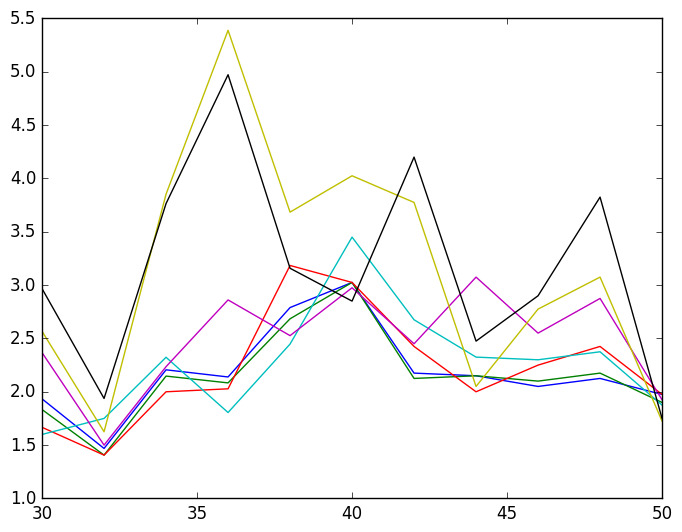

In [63]:
for j in 1:length(gamma_range)
    plot(m_range, r_mens[:, j])
end

In [64]:
m_range = 30:2:50
n = 40
beta_range = [0, 1, 2, 5, 10, 100]
r_mens = Array(Float64, length(m_range), length(beta_range))
for (i, m) in enumerate(m_range)
    m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n), set_epsilons(m, n)
    for (j, beta) in enumerate(beta_range)
        gamma = beta
        m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons)
        m_matched, _ = call_match(m_prefs, f_prefs)
        r_mens[i, j] = r_men(m_matched, m_prefs)
    end
end

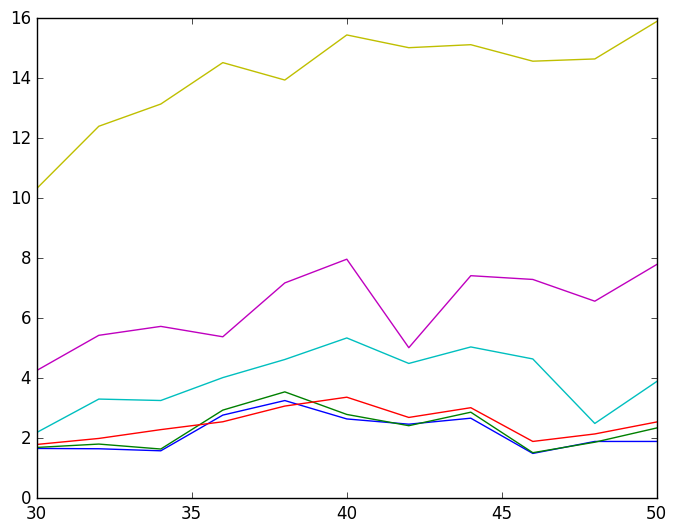

In [65]:
for j in 1:length(beta_range)
    plot(m_range, r_mens[:, j])
end

## 参考

I. Ashlagi, Y. Kanoria, and J. D. Leshno (2015). "[Unbalanced Random Matching Markets: The Stark Effect of Competition.]("http://web.stanford.edu/~iashlagi/papers/UnbalancedMatchingAKL.pdf")"

Rパッケージ [matchingMarkets]("https://github.com/thiloklein/matchingMarkets")

In [145]:
include("da2.jl")
m, n = 5, 5
beta = gamma = 0
m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n), set_epsilons(m, n)
m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons)

map(j -> utility(beta, gamma, 1, j, f_x_as, m_x_ds, f_x_ds, epsilons), 1:n)

5-element Array{Float64,1}:
  1.14512 
  2.77487 
  2.58092 
 -2.09078 
  0.165902

In [146]:
m_prefs

6x5 Array{Int64,2}:
 2  2  5  5  3
 3  5  3  1  1
 1  3  4  4  4
 5  4  1  2  2
 4  1  2  3  5
 0  0  0  0  0

In [ ]:
include("da2.jl")
m_range = 11:29
n = 20
gamma = 0
beta = 0
loops = 10
r_mens = Array(Float64, loops, length(m_range))
for (i, m) in enumerate(m_range)
    for l in 1:loops
        m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n), set_epsilons(m, n)
        m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds, epsilons)
        m_matched, _ = call_match(m_prefs, f_prefs)
        r_mens[l, i] = r_men(m_matched, m_prefs)
    end
end

In [ ]:
plot(m_range, [mean(r_mens[:, j]) for j in 1:length(m_range)])